# Step 1: Pre-processing your data

# Dealing with Missing Values 

In [1]:
import seaborn as sns
import matplotlib as plt
from sklearn import datasets
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('weatherAUS.csv')

Dropped "'RISK_MM'", as you asked me to drop it, else i will get very high accuracy.

In [3]:
df = df.drop(['RISK_MM'],axis=1)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

<h4>Hign percentage of missing values</h4>


The column 'Evaporation','Sunshine','Cloud3pm','Cloud9am' has very high percentage of missing values. So we will drop these columns

In [6]:
df.drop(labels = ['Evaporation','Sunshine','Cloud3pm','Cloud9am'],axis = 1,inplace = True)

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

# Handling Categorical Data

In [9]:
df['RainToday'].replace({'No':0,'Yes':1},inplace = True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0.0,0
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0.0,0
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0.0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0.0,1
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1.0,0


In [12]:
median = df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']].median()


In [13]:
median

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Temp9am            16.7
Temp3pm            21.1
dtype: float64

In [14]:
df = df.fillna(median)

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [16]:
mode = df[['WindGustDir','WindDir9am','WindDir3pm','RainToday']].mode().iloc[0]
df = df.fillna(mode)

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#  Dealing with Outliers

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 19 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
WindGustDir      142193 non-null object
WindGustSpeed    142193 non-null float64
WindDir9am       142193 non-null object
WindDir3pm       142193 non-null object
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        142193 non-null float64
RainTomorrow     142193 non-null int64
dtypes: float64(13), int64(1), object(5)
memory usage: 20.6+ MB


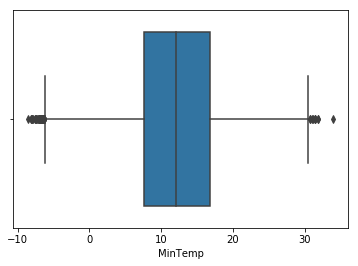

In [19]:
sns.boxplot(df['MinTemp'])

Only one outlier, identified

In [20]:
df=df[df['MinTemp']<33]

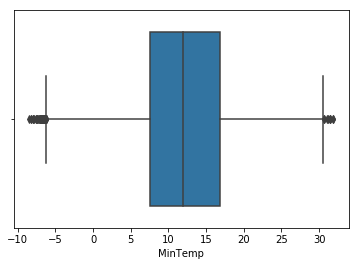

In [21]:
sns.boxplot(df['MinTemp'])

In [22]:
df = df.reset_index(drop=True)

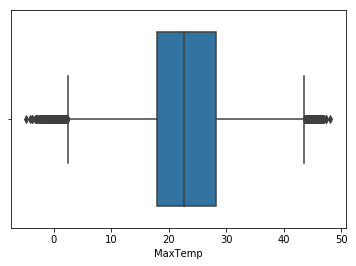

In [23]:
sns.boxplot(df['MaxTemp'])

No ourlier

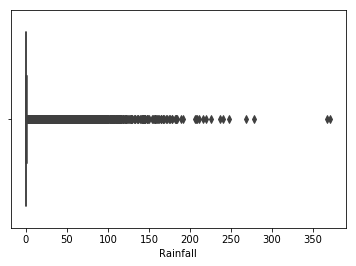

In [24]:
sns.boxplot(df['Rainfall'])

In [25]:
df=df[df['MinTemp']<33]

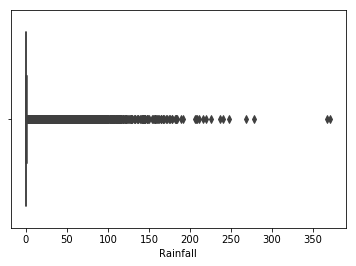

In [26]:
sns.boxplot(df['Rainfall'])

In [27]:
df=df[df['Rainfall']<250]

In [28]:
df = df.reset_index(drop=True)

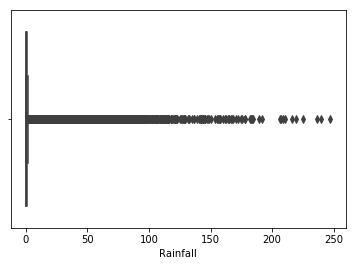

In [29]:
sns.boxplot(df['Rainfall'])

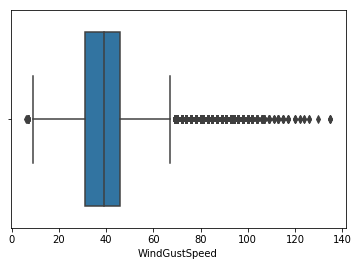

In [30]:
sns.boxplot(df['WindGustSpeed'])

No outlier

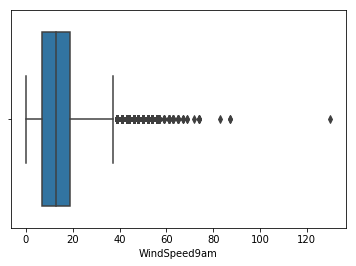

In [31]:
sns.boxplot(df['WindSpeed9am'])

No outlier

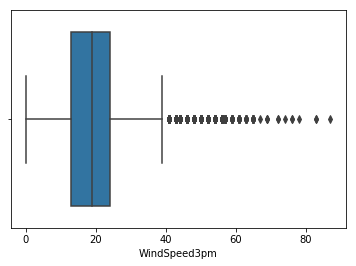

In [32]:
sns.boxplot(df['WindSpeed3pm'])

In [33]:
df=df[df['WindSpeed3pm']<70]

In [34]:
df = df.reset_index(drop=True)

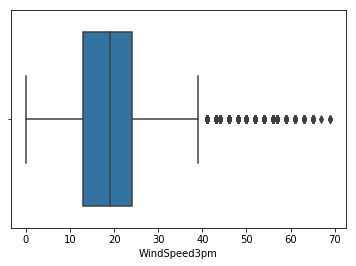

In [35]:
sns.boxplot(df['WindSpeed3pm'])

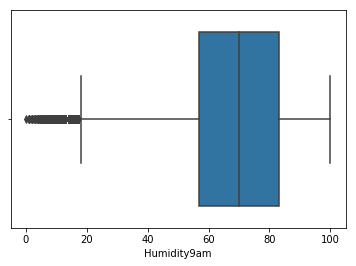

In [36]:
sns.boxplot(df['Humidity9am'])

No outlier

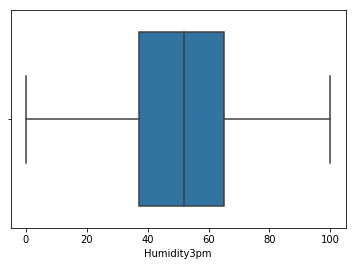

In [37]:
sns.boxplot(df['Humidity3pm'])

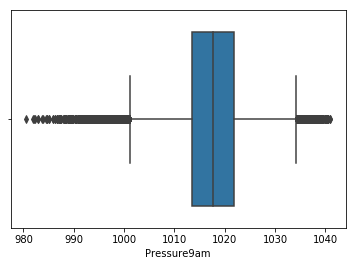

In [38]:
sns.boxplot(df['Pressure9am'])

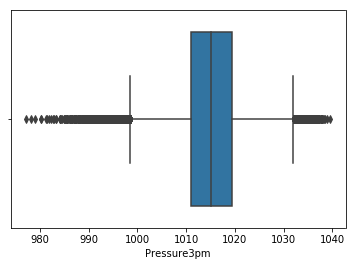

In [39]:
sns.boxplot(df['Pressure3pm'])

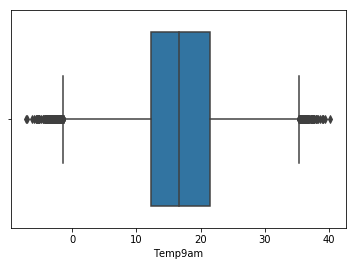

In [40]:
sns.boxplot(df['Temp9am'])

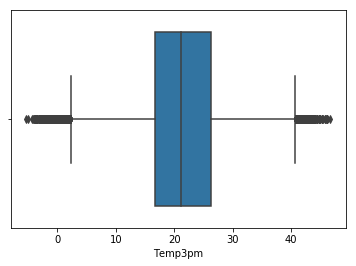

In [41]:
sns.boxplot(df['Temp3pm'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142179 entries, 0 to 142178
Data columns (total 19 columns):
Date             142179 non-null object
Location         142179 non-null object
MinTemp          142179 non-null float64
MaxTemp          142179 non-null float64
Rainfall         142179 non-null float64
WindGustDir      142179 non-null object
WindGustSpeed    142179 non-null float64
WindDir9am       142179 non-null object
WindDir3pm       142179 non-null object
WindSpeed9am     142179 non-null float64
WindSpeed3pm     142179 non-null float64
Humidity9am      142179 non-null float64
Humidity3pm      142179 non-null float64
Pressure9am      142179 non-null float64
Pressure3pm      142179 non-null float64
Temp9am          142179 non-null float64
Temp3pm          142179 non-null float64
RainToday        142179 non-null float64
RainTomorrow     142179 non-null int64
dtypes: float64(13), int64(1), object(5)
memory usage: 20.6+ MB


In [43]:
df.shape

(142179, 19)

# Handling Categorical Data

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
enc = OrdinalEncoder()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142179 entries, 0 to 142178
Data columns (total 19 columns):
Date             142179 non-null object
Location         142179 non-null object
MinTemp          142179 non-null float64
MaxTemp          142179 non-null float64
Rainfall         142179 non-null float64
WindGustDir      142179 non-null object
WindGustSpeed    142179 non-null float64
WindDir9am       142179 non-null object
WindDir3pm       142179 non-null object
WindSpeed9am     142179 non-null float64
WindSpeed3pm     142179 non-null float64
Humidity9am      142179 non-null float64
Humidity3pm      142179 non-null float64
Pressure9am      142179 non-null float64
Pressure3pm      142179 non-null float64
Temp9am          142179 non-null float64
Temp3pm          142179 non-null float64
RainToday        142179 non-null float64
RainTomorrow     142179 non-null int64
dtypes: float64(13), int64(1), object(5)
memory usage: 20.6+ MB


In [47]:
df[["Date",'Location','WindGustDir','WindDir9am','WindDir3pm']] = enc.fit_transform(df[["Date",'Location','WindGustDir','WindDir9am','WindDir3pm']]).astype(np.int64)

# Scaling Data

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))

In [51]:
X.shape

(142179, 18)

# Handling Imbalance 

In [52]:
Y = df['RainTomorrow']

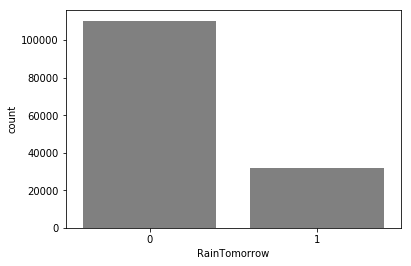

In [53]:

sns.countplot(Y, color='gray')

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [56]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [57]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

Accuracy:  0.8552187368124912


In [59]:
cf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', cf_mat)

Confusion matrix:
 [[21124   997]
 [ 3120  3195]]


In [60]:
from sklearn.svm import LinearSVC
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [61]:
# Use SMOTE to rebalance the dataset
sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_sample(x_train, y_train)
# Train the classifier
RANDOM_STATE = 42
clf = LinearSVC(random_state=RANDOM_STATE)
clf.fit(x_train, y_train)
print (clf.score(x_test, y_test))
# Print confusion matrix
y_pred = clf.predict(x_test)
cf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', cf_mat)

0.7840061893374596
Confusion matrix:
 [[17464  4657]
 [ 1485  4830]]


C:\Users\StudyEasy\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Feature Selection

In [62]:
#Y = Y.to_numpy()

In [63]:

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selector = SelectPercentile(f_regression, percentile=25)
selector.fit(X,Y)
selectedFeatures = []
i = 0
for n,s in zip(df.columns, selector.scores_):
    print ("Score : ", s, " for feature ", n)
    i+=1
    if s > 100:
        selectedFeatures.append(n)
        



Score :  16.918697560633476  for feature  Date
Score :  1.814212924465069  for feature  Location
Score :  1001.3308078864941  for feature  MinTemp
Score :  3690.915723193781  for feature  MaxTemp
Score :  8540.9816196217  for feature  Rainfall
Score :  407.0437687205311  for feature  WindGustDir
Score :  7554.308660401114  for feature  WindGustSpeed
Score :  181.85361927777922  for feature  WindDir9am
Score :  132.29989516631179  for feature  WindDir3pm
Score :  1169.981615526334  for feature  WindSpeed9am
Score :  1081.4025691121842  for feature  WindSpeed3pm
Score :  9906.259271803281  for feature  Humidity9am
Score :  34059.94674973885  for feature  Humidity3pm
Score :  8232.568823248317  for feature  Pressure9am
Score :  6865.6545123883525  for feature  Pressure3pm
Score :  94.0832562979038  for feature  Temp9am
Score :  5351.7200180316295  for feature  Temp3pm
Score :  14734.70189080631  for feature  RainToday


We will select these features for the model

In [64]:
selectedFeatures

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp3pm',
 'RainToday']

# Step 2: Basic models

In [65]:
newDF = df[selectedFeatures]

In [66]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,397,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,398,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,399,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,400,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [67]:
newDF.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,0.0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,0.0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,0.0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,0.0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,0.0


In [69]:
X = scaler.fit_transform(newDF)

In [70]:
Y = df['RainTomorrow']

As processing is taking very long time, dropping rows

In [71]:
print(X.shape)
print(Y.shape)

X = X[0:5000,:]

Y = Y[0:5000]

print(X.shape)
print(Y.shape)

(142179, 15)
(142179,)
(5000, 15)
(5000,)


In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [73]:
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

In [74]:

models = [DecisionTreeClassifier,GaussianNB,SVC,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier,LogisticRegression,XGBClassifier]
accuracy_list = []
for i in models:
    i = i()
    i = i.fit(x_train,y_train)
    accuracy = i.score(x_test,y_test)
    accuracy_list.append(accuracy*100)
    print('{} accuracy:'.format(i),accuracy)
print('accuracy_list:',accuracy_list)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') accuracy: 0.818
GaussianNB(priors=None, var_smoothing=1e-09) accuracy: 0.827
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) accuracy: 0.879
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') accuracy: 0.859
RandomForestClassifier(boot

In [75]:
model_accuracy = pd.DataFrame({'Models':models , 'Accuracies':accuracy_list})

[[<class 'xgboost.sklearn.XGBClassifier'> 88.3]
 [<class 'sklearn.svm._classes.SVC'> 87.9]
 [<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> 87.9]
 [<class 'sklearn.linear_model._logistic.LogisticRegression'> 87.5]
 [<class 'sklearn.ensemble._forest.RandomForestClassifier'> 87.2]
 [<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 85.9]
 [<class 'sklearn.naive_bayes.GaussianNB'> 82.69999999999999]
 [<class 'sklearn.tree._classes.DecisionTreeClassifier'> 81.8]]


In [77]:
model_accuracy = model_accuracy.sort_values(by ='Accuracies',ascending = False )

In [78]:
print(model_accuracy)

                                              Models  Accuracies
7            <class 'xgboost.sklearn.XGBClassifier'>        88.3
2                 <class 'sklearn.svm._classes.SVC'>        87.9
5  <class 'sklearn.ensemble._gb.GradientBoostingC...        87.9
6  <class 'sklearn.linear_model._logistic.Logisti...        87.5
4  <class 'sklearn.ensemble._forest.RandomForestC...        87.2
3  <class 'sklearn.neighbors._classification.KNei...        85.9
1           <class 'sklearn.naive_bayes.GaussianNB'>        82.7
0  <class 'sklearn.tree._classes.DecisionTreeClas...        81.8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


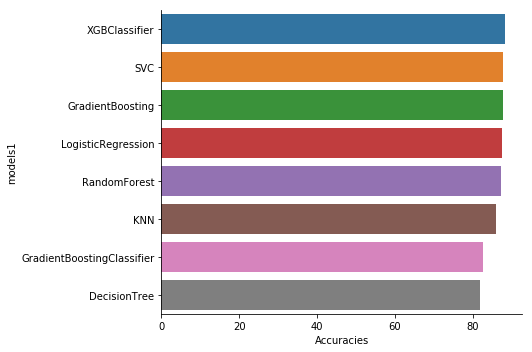

In [287]:
tAccuracies = [88.3,87.9, 87.9,87.5,87.2,85.9, 82.7, 81.8]
tModels = ['XGBClassifier','SVC','GradientBoosting','LogisticRegression','RandomForest','KNN','GradientBoostingClassifier','DecisionTree']
model_accuracy["models1"] = tModels
#model_accuracy.drop('Models')

# plt.xlabel('Models')
# plt.ylabel('Accuracies')
# plt.title('Accuracies for the respected Models')
# plt.plot(tModels,tAccuracies)

sns.catplot(data=model_accuracy, x= 'Accuracies',y='models1',size=5,aspect=1.5,kind='bar')

# Step 3: Hyper-parameter optimization (GradientBoosting, SVC, XGB)

<h3>Gradient Boosting</h3>

In [79]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [289]:
gradientBoostingClassifierModel = GradientBoostingClassifier()

scores = model_selection.cross_val_score(gradientBoostingClassifierModel, X, Y, cv=10)
print (scores.mean())



0.8244117070601504


In [ ]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


clf = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


clf.fit(X, Y)
print("\n Best parameters set found on development set:")
print(clf.best_params_ , "with a score of ", clf.best_score_)

# Hyper-parameter tuning for SVC

In [ ]:
SVCModel = SVC()

scores = model_selection.cross_val_score(SVCModel, X, Y, cv=10)
print (scores.mean())

In [ ]:
from sklearn import svm


In [ ]:

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=10)
clf.fit(X, Y)
print("\n Best parameters set found on development set:")
print(clf.best_params_ , "with a score of ", clf.best_score_)
    

Best parameters set found on development set:
{'C': 10, 'gamma': 0.01} with a score of  0.8748000000000001

# Hyper-parameter tuning for XGB¶ 

In [ ]:

xgb_cfl = XGBClassifier()
param_grid = {
        'n_estimators' : [100, 200, 300],
        'learning_rate' : [0.01, 0.02],
        'min_child_weight': [1, 3, 5],
        'gamma': [0.1, 0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4, 5]
        }


clf = GridSearchCV(xgb_cfl, param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)
clf.fit(X, Y)
print("\n Best parameters set found on development set:")
print(clf.best_params_ , "with a score of ", clf.best_score_)

Best parameters set found on development set:
{'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.6} with a score of  0.8736

# Final Step: Optimized models (Without feature selection)

# 1. GradientBoosting

Will discuss feature selection in research part

In [ ]:
newDF.head()

In [ ]:
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']
X = X[0:5000,:]
Y = Y[0:5000]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
gradientBoostingClassifierModel = GradientBoostingClassifier(max_depth= 80,max_features = 2, min_samples_leaf=3,min_samples_split=8, n_estimators=200)
gradientBoostingClassifierModel.fit(x_train, y_train)
y_pred = gradientBoostingClassifierModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

# 2. SVC

In [ ]:
# X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
# Y = df['RainTomorrow']
# X = X[0:5000,:]
# Y = Y[0:5000]
# x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


SVCModel = SVC(C=10, gamma=0.01)
SVCModel.fit(x_train, y_train)
y_pred = SVCModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

# 3. XGB

In [ ]:
clf = XGBClassifier(colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300,subsample=0.6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

# Reseach - Feature selection

# Before Univariate Feature Selection

In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)


gradientBoostingClassifierModel = GradientBoostingClassifier()
gradientBoostingClassifierModel.fit(x_train, y_train)
y_pred = gradientBoostingClassifierModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

Accuracy:  0.849345899563933


# After univariate Feature Selection

In [296]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selector = SelectPercentile(f_regression, percentile=25)
selector.fit(X,Y)
selectedFeatures = []
i = 0
for n,s in zip(df.columns, selector.scores_):
    print ("Score : ", s, " for feature ", n)
    i+=1
    if s > 100:
        selectedFeatures.append(n)
    else:
        print("Dropped features :", n)
        
newDF = df[selectedFeatures]

X = scaler.fit_transform(newDF)
Y = df['RainTomorrow']

Score :  16.918697560633316  for feature  Date
Dropped features : Date
Score :  1.8142129244633798  for feature  Location
Dropped features : Location
Score :  1001.3308078866936  for feature  MinTemp
Score :  3690.9157231958307  for feature  MaxTemp
Score :  8540.981619623162  for feature  Rainfall
Score :  407.04376871994566  for feature  WindGustDir
Score :  7554.308660406997  for feature  WindGustSpeed
Score :  181.85361927760505  for feature  WindDir9am
Score :  132.2998951661618  for feature  WindDir3pm
Score :  1169.981615526182  for feature  WindSpeed9am
Score :  1081.402569108782  for feature  WindSpeed3pm
Score :  9906.259271784551  for feature  Humidity9am
Score :  34059.94674971731  for feature  Humidity3pm


In [292]:
import matplotlib.pyplot as plt
uni_sortedIndices = np.argsort(selector.scores_)
numberOfFeatures = []
uni_accur = []

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

for num in range(0, 10):
    numberOfFeatures.append(num)

    # obtain indices to delete by slicing the order indices from argsort function
    indicesToDelete = uni_sortedIndices[0:num + 1]
    # delete identified indices
    x_train_new = np.delete(x_train, indicesToDelete, axis=1)
    x_test_new = np.delete(x_test, indicesToDelete, axis=1)
    
    
    gradientBoostingClassifierModel = GradientBoostingClassifier()
    gradientBoostingClassifierModel.fit(x_train_new, y_train)
    y_pred = gradientBoostingClassifierModel.predict(x_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    uni_accur.append(accuracy)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: in the future out of bounds indices will raise an error instead of 

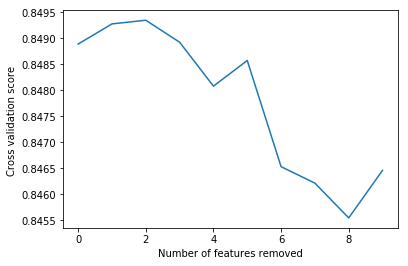

In [212]:

plt.figure()
plt.xlabel("Number of features removed")
plt.ylabel("Cross validation score ")
plt.plot(numberOfFeatures, uni_accur)
plt.show()

In [269]:
uni_accur

[0.8488887325924884,
 0.8492755661837108,
 0.849345899563933,
 0.8489238992825995,
 0.8480798987199325,
 0.8485722323814883,
 0.8465325643550429,
 0.8462160641440427,
 0.8455478970319313,
 0.8464622309748207]

In [290]:
uni_sortedIndices

array([ 1,  0, 15,  8,  7,  5,  2, 10,  9,  3, 16, 14,  6, 13,  4, 11, 17,
       12], dtype=int64)

# Before Greedy Feature Selection

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']


gradientBoostingClassifierModel = GradientBoostingClassifier()
gradientBoostingClassifierModel.fit(x_train, y_train)
y_pred = gradientBoostingClassifierModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

Accuracy:  0.849345899563933


In [194]:
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import matplotlib.pyplot as plt

scaler = StandardScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']



gradientBoostingClassifier = GradientBoostingClassifier()
scores = model_selection.cross_val_score(gradientBoostingClassifier, X, Y, cv=10)
print ('Initial Result',scores.mean())
estimator = linear_model.LogisticRegression(multi_class='auto', solver ='lbfgs')
rfecv = RFECV(estimator, cv=10)
rfecv.fit(X, Y)
# optimal number of features
print (rfecv.n_features_)
# ranking of each feature
print (rfecv.ranking_)


Initial Result 0.8247774396478798
6
[13 11  3  2  5 10  1  7  8  6  1  4  1  1  1 12  9  1]


In [195]:
indexes = []
for index in range(0, len(rfecv.ranking_)):
    if rfecv.ranking_[index] == 1:
        indexes.append(index)
print(indexes)

[6, 10, 12, 13, 14, 17]


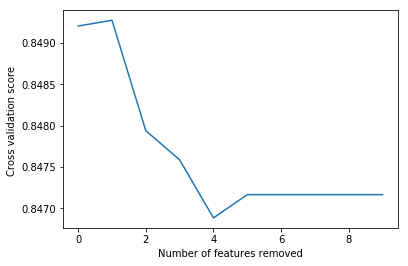

In [196]:
RFECVsortedIndices = np.argsort(indexes)
numberOfFeatures = []
RFECVaccur = []

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

for num in range(0, 10):
    numberOfFeatures.append(num)

    # obtain indices to delete by slicing the order indices from argsort function
    indicesToDelete = RFECVsortedIndices[0:num + 1]
    # delete identified indices
    x_train_new = np.delete(x_train, indicesToDelete, axis=1)
    x_test_new = np.delete(x_test, indicesToDelete, axis=1)
    
    
    gradientBoostingClassifierModel = GradientBoostingClassifier()
    gradientBoostingClassifierModel.fit(x_train_new, y_train)
    y_pred = gradientBoostingClassifierModel.predict(x_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    RFECVaccur.append(accuracy)




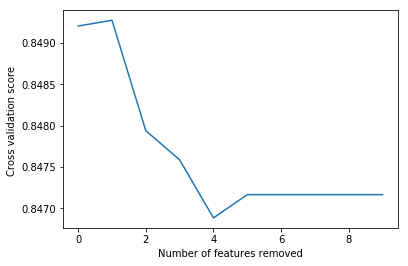

In [213]:
plt.figure()
plt.xlabel("Number of features removed")
plt.ylabel("Cross validation score ")
plt.plot(numberOfFeatures, RFECVaccur)
plt.show()

In [197]:
rfecv.ranking_



array([13, 11,  3,  2,  5, 10,  1,  7,  8,  6,  1,  4,  1,  1,  1, 12,  9,
        1])

In [270]:
RFECVaccur

[0.8492052328034886,
 0.8492755661837108,
 0.847939231959488,
 0.8475875650583767,
 0.8468842312561542,
 0.8471655647770432,
 0.8471655647770432,
 0.8471655647770432,
 0.8471655647770432,
 0.8471655647770432]

In [198]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Conclusion: Greedy Feature Selection for the dataset gives optimal select, that is, when we drop the least sginificant feature. Humidity3pm is the column we sould drop to get better accuracy

With RFE only

In [199]:
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE

scaler = StandardScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']



gradientBoostingClassifier = GradientBoostingClassifier()
scores = model_selection.cross_val_score(gradientBoostingClassifier, X, Y, cv=10)
print ('Initial Result',scores.mean())
estimator = linear_model.LogisticRegression(multi_class='auto', solver ='lbfgs')
rfe = RFE(estimator)
rfe.fit(X, Y)
# optimal number of features
print (rfe.n_features_)
# ranking of each feature
print (rfe.ranking_)


Initial Result 0.8247774396478798
9
[10  8  1  1  2  7  1  4  5  3  1  1  1  1  1  9  6  1]


In [200]:
indexes = []
for index in range(0, len(rfe.ranking_)):
    if rfecv.ranking_[index] == 1:
        indexes.append(index)
print(indexes)

[6, 10, 12, 13, 14, 17]


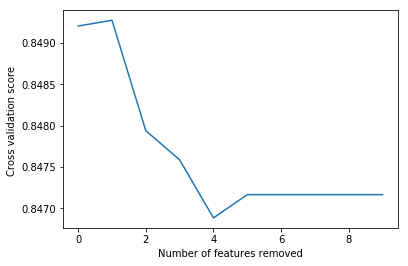

In [201]:
RFEsortedIndices = np.argsort(indexes)
numberOfFeatures = []
RFEaccur = []

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

for num in range(0, 10):
    numberOfFeatures.append(num)

    # obtain indices to delete by slicing the order indices from argsort function
    indicesToDelete = RFEsortedIndices[0:num + 1]
    # delete identified indices
    x_train_new = np.delete(x_train, indicesToDelete, axis=1)
    x_test_new = np.delete(x_test, indicesToDelete, axis=1)
    
    
    gradientBoostingClassifierModel = GradientBoostingClassifier()
    gradientBoostingClassifierModel.fit(x_train_new, y_train)
    y_pred = gradientBoostingClassifierModel.predict(x_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    RFEaccur.append(accuracy)




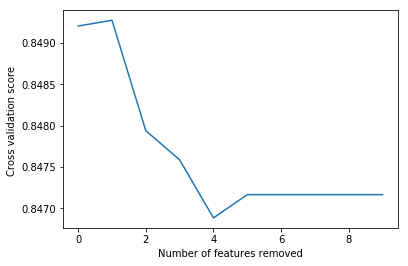

In [214]:
plt.figure()
plt.xlabel("Number of features removed")
plt.ylabel("Cross validation score ")
plt.plot(numberOfFeatures, RFEaccur)
plt.show()

#  Before Chi-Square  Feature Selection 

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']


gradientBoostingClassifierModel = GradientBoostingClassifier()
gradientBoostingClassifierModel.fit(x_train, y_train)
y_pred = gradientBoostingClassifierModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

Accuracy:  0.849345899563933


# Chi-Square Feature Selection

In [203]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [204]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']

chi_scores = chi2(X,Y)

In [205]:
chi_scores

(array([2.00913517e+00, 3.22714303e-01, 4.85643253e+01, 1.22658041e+02,
        9.55291969e+02, 7.39902021e+01, 2.82741797e+02, 3.52551816e+01,
        2.33854643e+01, 4.99152362e+01, 6.32883347e+01, 4.82053773e+02,
        2.24912294e+03, 1.57571682e+02, 1.22616681e+02, 3.43544911e+00,
        1.72621062e+02, 1.03981300e+04]),
 array([1.56354426e-001, 5.69980996e-001, 3.19630985e-012, 1.65678304e-028,
        9.38432704e-210, 7.85057248e-018, 1.89723580e-063, 2.89211587e-009,
        1.32576558e-006, 1.60533244e-012, 1.78558622e-015, 7.63570804e-107,
        0.00000000e+000, 3.83911601e-036, 1.69168226e-028, 6.38112337e-002,
        1.98027478e-039, 0.00000000e+000]))

In [206]:
p_values = pd.Series(chi_scores[1])
p_values.sort_values(ascending = False , inplace = True)

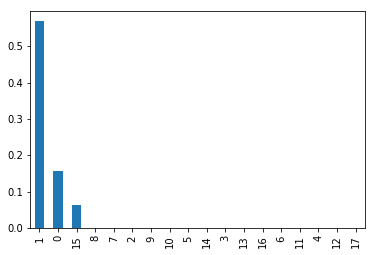

In [207]:
p_values.plot.bar()

In [232]:
chisortedIndices = [1,0,15]
numberOfFeatures = []
chiaccur = []

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

for num in range(0, 4):
    numberOfFeatures.append(num)

    # obtain indices to delete by slicing the order indices from argsort function
    indicesToDelete = chisortedIndices[0:num + 1]
    # delete identified indices
    x_train_new = np.delete(x_train, indicesToDelete, axis=1)
    x_test_new = np.delete(x_test, indicesToDelete, axis=1)
    
    
    gradientBoostingClassifierModel = GradientBoostingClassifier()
    gradientBoostingClassifierModel.fit(x_train_new, y_train)
    y_pred = gradientBoostingClassifierModel.predict(x_test_new)
    accuracy = accuracy_score(y_test, y_pred)
    chiaccur.append(accuracy)




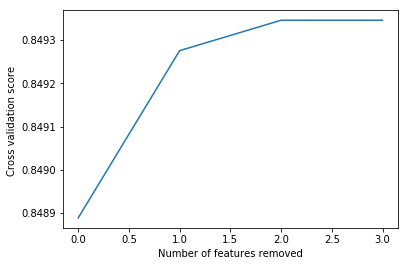

In [233]:
plt.figure()
plt.xlabel("Number of features removed")
plt.ylabel("Cross validation score ")
plt.plot(numberOfFeatures, chiaccur)
plt.show()

In [271]:
chiaccur

[0.8488887325924884, 0.8492755661837108, 0.849345899563933, 0.849345899563933]

# Correlations

ref: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [239]:
corr = df.corr()

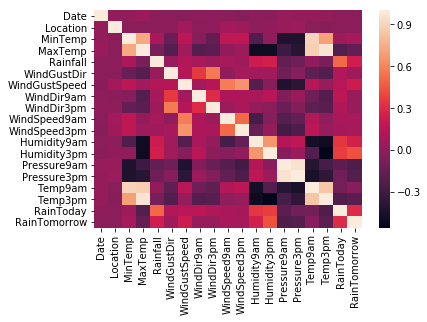

In [240]:
sns.heatmap(corr)

In [257]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
data = df[selected_columns]

In [258]:
import statsmodels.api as sm

In [259]:
selected_columns = selected_columns[0:-1].values

In [260]:
selected_columns

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Temp9am', 'RainToday'], dtype=object)

In [261]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,0:-1].values, data.iloc[:,-1].values, SL, selected_columns)

In [262]:
result = pd.DataFrame()
result['RainTomorrow'] = data.iloc[:,-1]

In [263]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

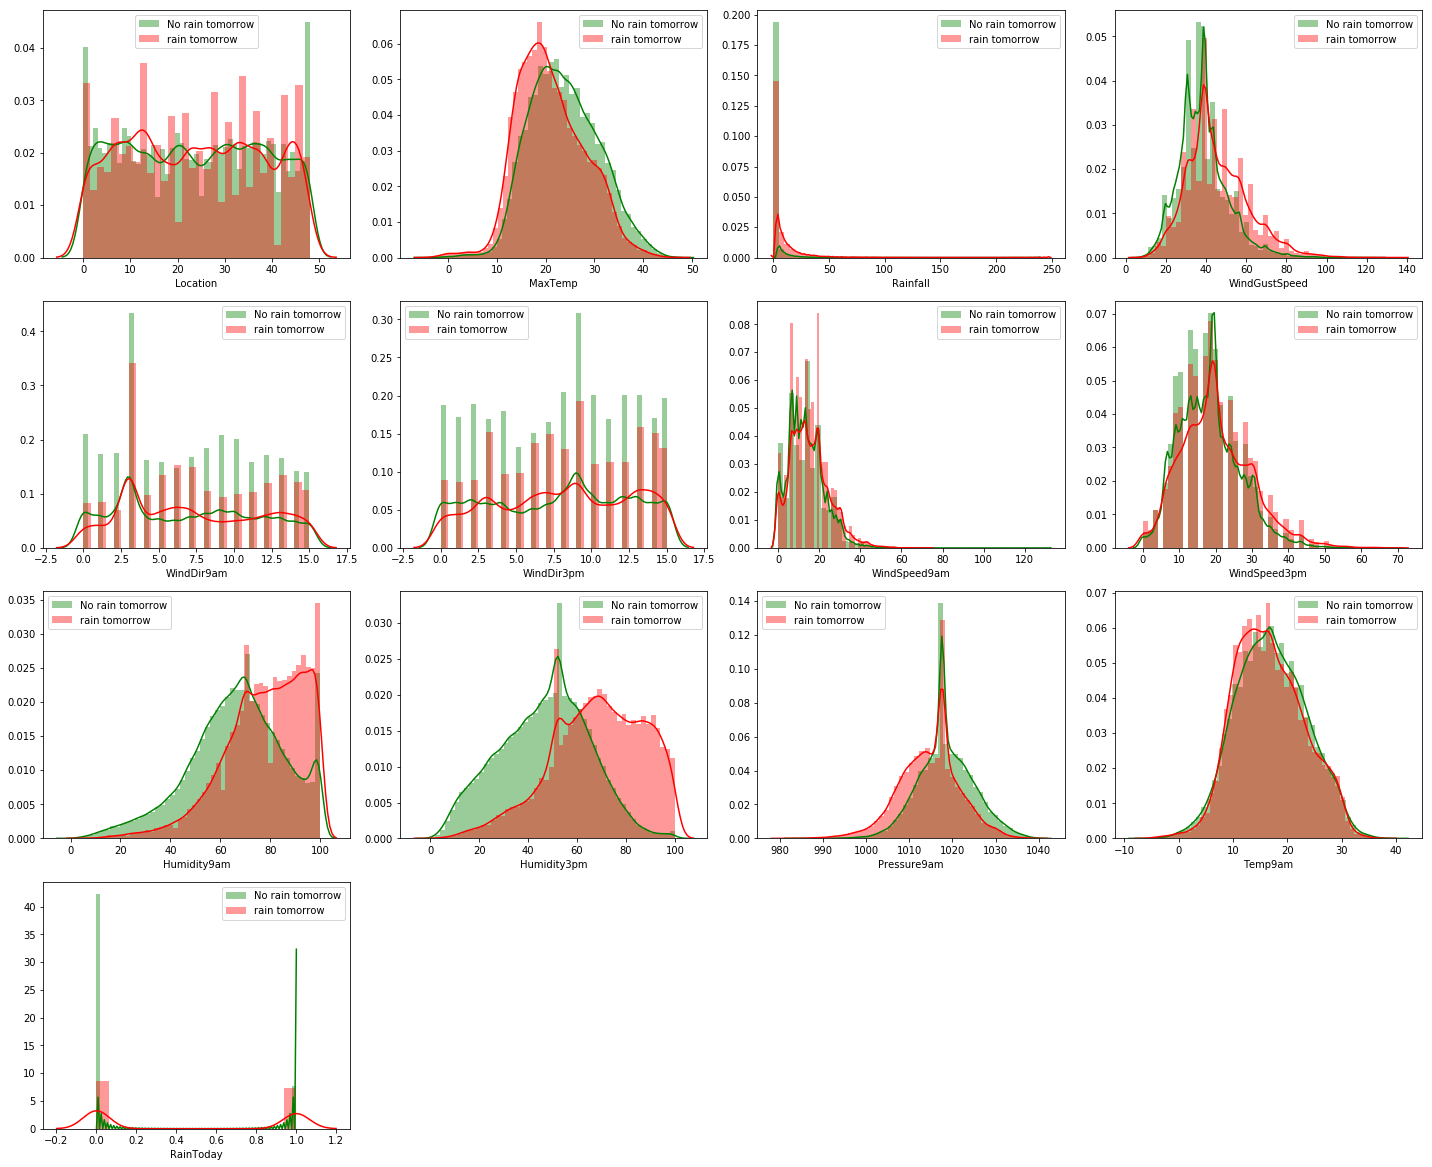

In [264]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['RainTomorrow']==0], color='g', label = 'No rain tomorrow')
    sns.distplot(data[i][result['RainTomorrow']==1], color='r', label = 'rain tomorrow')
    plt.legend(loc='best')
#fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(data.values, result.values, test_size = 0.2)

In [266]:
gradientBoostingClassifier = GradientBoostingClassifier()
gradientBoostingClassifier.fit(X_train, Y_train)

C:\Users\StudyEasy\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [267]:
pred = gradientBoostingClassifier.predict(X_test)

In [268]:
cm = confusion_matrix(Y_test, pred)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/X_test.shape[0]
print(accuracy)

0.84487972991982


# Evaluation 

In [273]:
methods = ["Univariate","Greedy", "Chi-Square", "Correlations"]
best_vals = [0.849345899563933,0.8492755661837108,0.849345899563933,0.84487972991982]

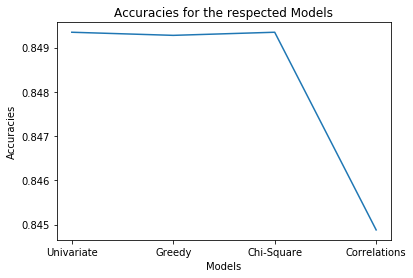

In [274]:
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Accuracies for the respected Models')
plt.plot(methods, best_vals)

# Conslusion

Univariate perfromed best with "0.849345899563933" accuracy

# best possible model

As the best model is XGB for our data, and we found the best parameters and features, lets build the best possible model

In [303]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(labels = ['RainTomorrow'],axis = 1))
Y = df['RainTomorrow']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

features_to_be_deleted = [0,1]

for f in features_to_be_deleted:
    x_train = np.delete(x_train, f, axis=1)
    x_test = np.delete(x_test, f, axis=1)

clf = XGBClassifier(colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=300,subsample=0.6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy )

Accuracy:  0.8464622309748207
